# User Clustering

In [28]:
#ref:https://www.reneshbedre.com/blog/tsne.html
import pandas as pd

In [29]:
df=pd.read_csv('./data/extn_pvt_03_08.csv')
df.drop(columns=['hubsextension'],axis=1,inplace=True) #mostly visited extension. so dropping
df.reset_index(inplace=True)
df.head(5)

,index,PreciseTimeStamp,Score,appinsightsextension,appplatformextension,azure_marketplace_confluent,azure_marketplace_datadog,azure_marketplace_dynatrace,azure_marketplace_elastic,azure_marketplace_liftr_logz,...,scanx_management,servicelinkerextension,sqlazureextension,universal_print,vlcentral_casemanagement,vlcentral_quote,vlcentral_uum,vmcp,wandiscoextension,websitesextension
0,0,2022-07-09 16:04:05.3190624,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2022-07-09 07:32:12.5085779,9,4,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,40
2,2,2022-07-09 14:33:45.8130206,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2022-07-09 14:46:04.3394053,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2022-07-09 04:42:36.3291503,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#df.iloc[:,3:]=df.iloc[:,3:].astype(bool).astype(int)

In [31]:
df=df.sample(n=10000)

In [32]:
df.head(5)

,index,PreciseTimeStamp,Score,appinsightsextension,appplatformextension,azure_marketplace_confluent,azure_marketplace_datadog,azure_marketplace_dynatrace,azure_marketplace_elastic,azure_marketplace_liftr_logz,...,scanx_management,servicelinkerextension,sqlazureextension,universal_print,vlcentral_casemanagement,vlcentral_quote,vlcentral_uum,vmcp,wandiscoextension,websitesextension
132821,132821,2022-07-15 07:16:39.5651320,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138348,138348,2022-08-29 11:26:29.2169130,10,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,175
54086,54086,2022-05-11 23:52:27.7690220,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117085,117085,2022-03-01 10:08:38.3199518,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126212,126212,2022-03-22 09:26:11.8800762,10,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#df=df.head(1000).copy() ###--remove this before full flight

### T-SNE dimensionality reduction

In [34]:
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [35]:
tnse_em=TSNE(n_components=2,perplexity=60,n_iter=3000,verbose=1).fit_transform(df.iloc[:,3:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 4.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.980263
[t-SNE] KL divergence after 3000 iterations: 1.120053


In [36]:
tnse_em.shape

(10000, 2)

In [37]:
tnse_em

array([[ 55.40821  ,  28.488409 ],
       [-66.068344 ,   1.1327921],
       [ -2.6303427, -23.85348  ],
       ...,
       [-36.12641  ,  38.378036 ],
       [  4.891745 ,  80.233536 ],
       [ 22.641582 , -19.456635 ]], dtype=float32)

In [38]:
df['tsne_1']=tnse_em[:,0]
df['tsne_2']=tnse_em[:,1]

### DBSCAN Clustering

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
get_clusters=DBSCAN(eps=2, min_samples=11).fit_predict(tnse_em)

In [41]:
get_clusters.shape

(10000,)

In [42]:
df['cluster']=get_clusters

In [43]:
df[['index','tsne_1','tsne_2','cluster']]

,index,tsne_1,tsne_2,cluster
132821,132821,55.408211,28.488409,0
138348,138348,-66.068344,1.132792,17
54086,54086,-2.630343,-23.853479,1
117085,117085,35.487000,-9.643485,0
126212,126212,-17.956198,10.945735,2
...,...,...,...,...
68518,68518,-31.285967,13.016080,-1
134833,134833,-16.409576,50.204945,5
128668,128668,-36.126411,38.378036,3
40028,40028,4.891745,80.233536,7


In [44]:
#set(get_clusters)

### Visualize clusters

In [45]:
import seaborn as sns

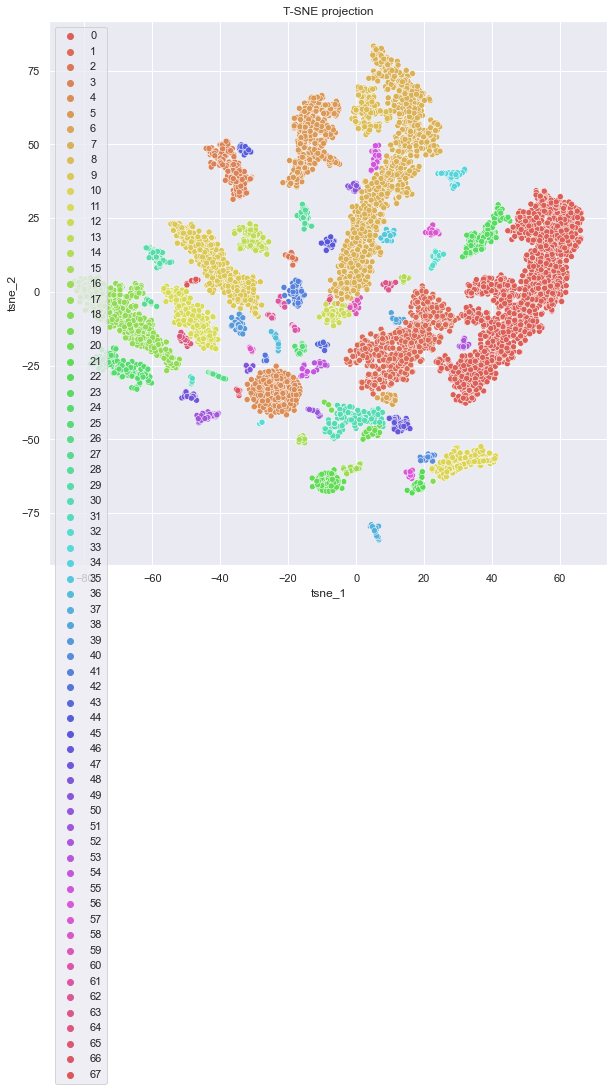

In [46]:
sns.scatterplot(data=df[df.cluster>-1],x='tsne_1',y='tsne_2'
                ,hue=df[df.cluster>-1].cluster.tolist()
               ,palette=sns.color_palette('hls',len(set(get_clusters))-1)
               ).set(title='T-SNE projection')
sns.set(rc={'figure.figsize':(10,10)})

In [47]:
#todo
# hyper parameter tuning of t-SNE
# hyper parameter tuning of DBSCAN
# try PCA, compare PCA & t-SNE
#